## Gradient Descent
Given a function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ gradient descent finds the minimizer of $f$ by iteratively moving along the negative gradient $-Df(x)$ at each step. The gradient points in the direction of greatest increase, so moving in the opposite direction ensures we move in the direction of greatest decrease. This defines an iterative method for finding the minimizer of $f$ as follows. Given an initial starting point $x_0$, define a sequence $(x_k)_{k=0}^{\infty}$ recursively as

$$x_{k+1} = x_k - \alpha_kDf(x_k)^T$$

where $\alpha_k \in \mathbb{R}$ is called the step size and may be chosen in various ways. As an aside, in this notebook, we use the convention that the gradient $Df(x_k)$ is a row vector, while $x_k$ is a standard column vector. It can be shown that the sequence $(x_k)_{k=0}^{\infty}$ converges for all initial guesses.

One common way to choose the step size $\alpha_k$ is to define a new function $\phi_k : \mathbb{R} \rightarrow \mathbb{R}$ as

$$\phi_k(\alpha) = f(x_k - \alpha Df(x_k)^T)$$

and minimize this at each step. The function $\phi_k$ is a one dimensional function that is the same as $f$ along the slice in the direction of the gradient. Choosing $\alpha_k$ in this way is often called $\textit{exact}$ gradient descent.

To help visualize this, let $f(x, y) = x^2 + 7y^2 + 2x + y + 2$, so $Df(x, y) = \begin{bmatrix}2x + 2 & 14y + 1 \end{bmatrix}$. At the point $(0, 1)$ we have $Df(0, 1) = \begin{bmatrix}2 & 15\end{bmatrix}$. Both a 3d graph and contour plot of $f$, the point $(0, 1, 10)$, and the gradient vector are shown below.

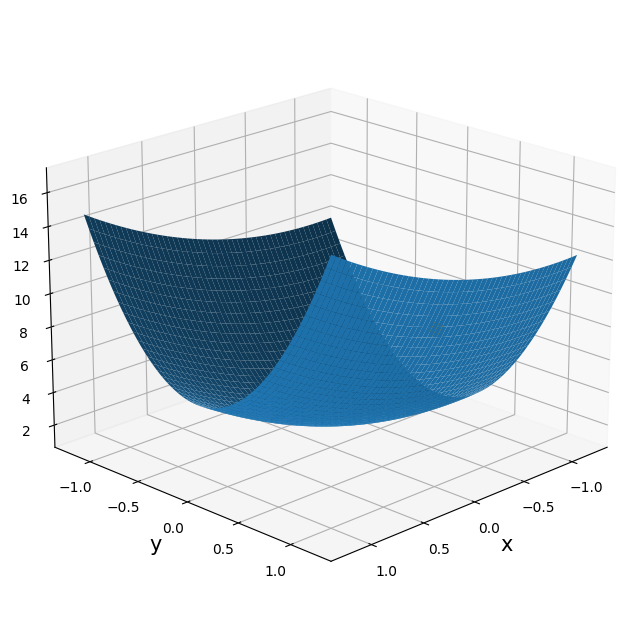

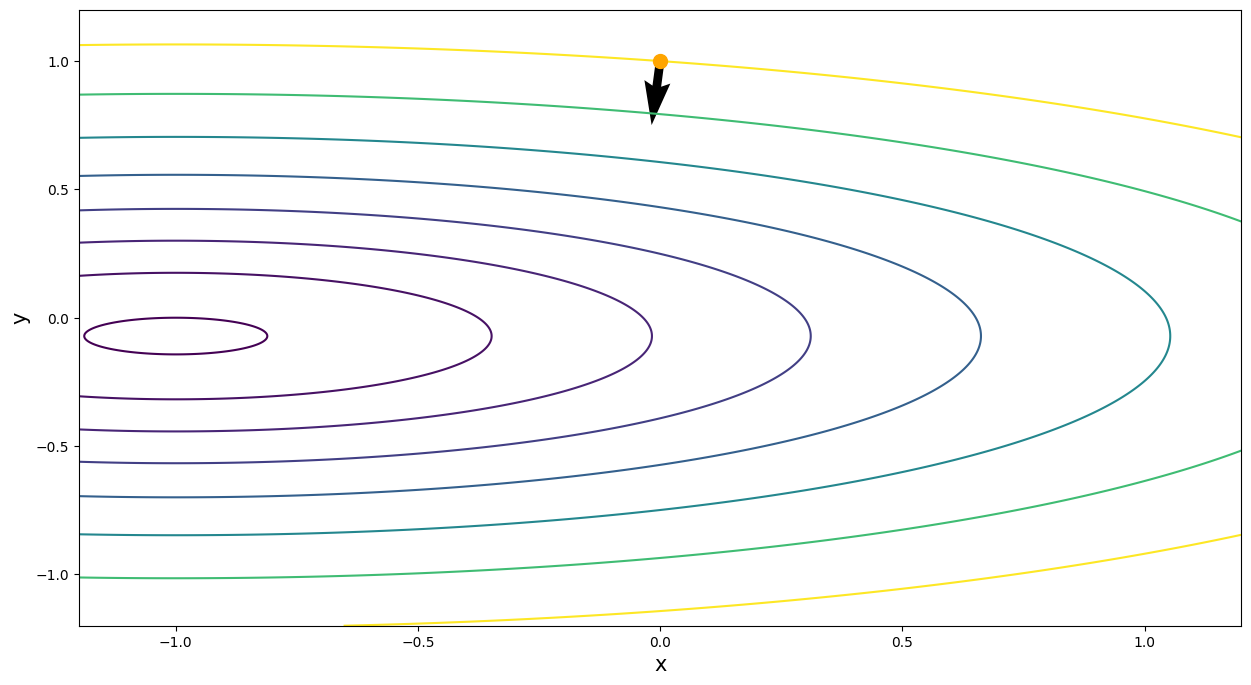

In [6]:
import numpy as np
from matplotlib import pyplot as plt, animation
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
import scipy.linalg as la
from IPython.display import HTML

%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

f = lambda x: x[0]**2 + 7*x[1]**2 + 2*x[0] + x[1] + 2
Df = lambda x: np.array([2*x[0] + 2, 14*x[1] + 1])

x, y = np.linspace(-1.2, 1.2, 1000), np.linspace(-1.2, 1.2, 1000)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.plot([0],[1],[10], marker='.', color='orange', ms=20)
ax.view_init(elev=20, azim=45)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
plt.show()

plt.contour(X, Y, Z, levels=np.logspace(0, 1, 8))
plt.quiver([0], [1], [-2], [-15])
plt.plot(0, 1, marker='.', color='orange', ms=20)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.show()

At the point $(0, 1)$, we have $\phi(\alpha) = f(-2\alpha, 1 - 15\alpha)$. Note that when $\alpha = 0$, we are at the point $(0, 1, 10)$, and as $\alpha$ increases, we move down the function.

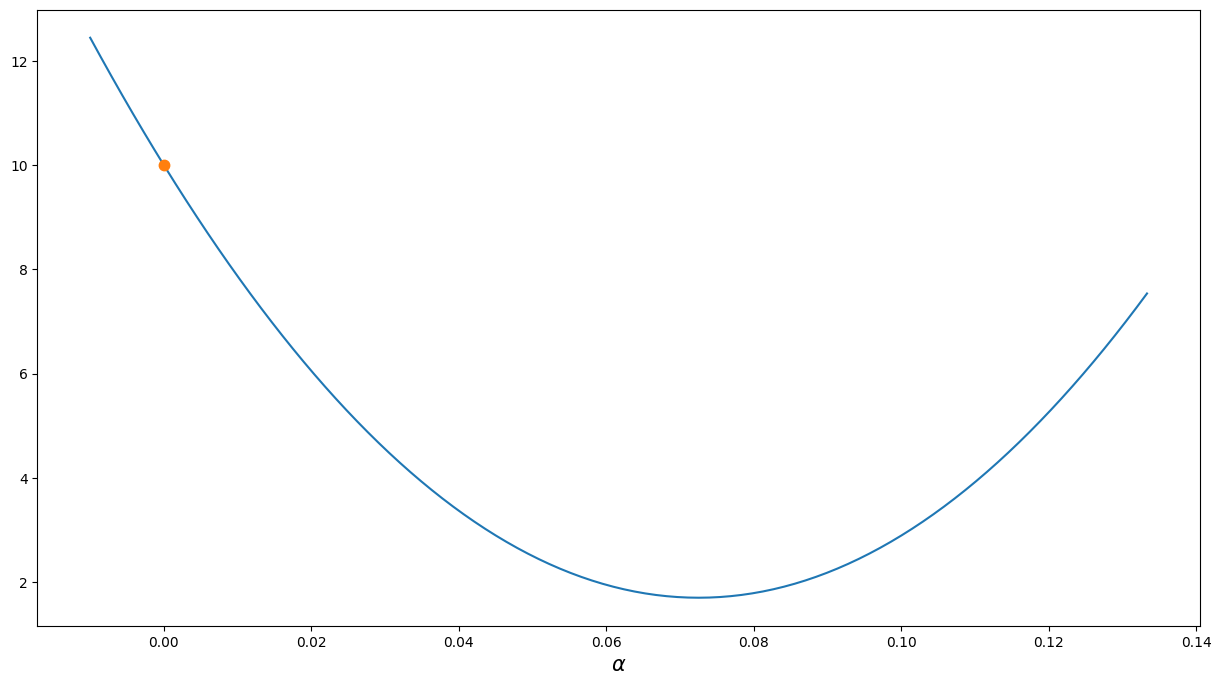

In [7]:
phi = lambda a: f([-2*a, 1-15*a])
a = np.linspace(-.01, 2/15, 100)
plt.plot(a, phi(a))
plt.plot(0, 10, '.', ms=15)
plt.xlabel(r'$\alpha$', size=15)
plt.show()

A necessary condition for us to know when we have reached a minimizer is that the gradient will be zero at that point. Thus at each step of the algorithm, we check the norm of the gradient and stop when it reaches some small tolerance parameter. This process guarantees that we arrive at a local minimizer of the function. Code for the gradient descent algorithm is below.

In [4]:
def gradient_descent(f, Df, x0, maxiter=100, tol=1e-5):
    """Compute the minimizer of f using the exact method of gradient descent.

    Parameters:
        f (function): The objective function. Accepts a NumPy array of shape
            (n,) and returns a float.
        Df (function): The first derivative of f. Accepts and returns a NumPy
            array of shape (n,).
        x0 ((n,) ndarray): The initial guess.
        maxiter (int): The maximum number of iterations to compute.
        tol (float): The stopping tolerance.

    Returns:
        ((n,) ndarray): The approximate minimum of f.
        (float): The minimum value of f.
        (int): The number of iterations computed.
    """
    for k in range(1, maxiter+1):
        # Compute derivative and check stopping criteria
        dfx0 = Df(x0)
        if la.norm(dfx0, ord=np.inf) < tol:
            break
            
        # Define and optimize 1-D function in the direction of negative gradient
        phi = lambda a: f(x0 - a*dfx0)
        x0 = x0 - opt.minimize_scalar(phi).x*dfx0
        
    return x0, f(x0), k

Using this method, we can find the minimizer of $f$.

In [5]:
minimizer, value = gradient_descent(f, Df, np.array([0, 1]))[:2]
print("Minimizer: ", minimizer)
print("Minimum value: ", value)

Minimizer:  [-0.99999701 -0.07142863]
Minimum value:  0.964285714295


While minimizing $\phi$ at each stage of the algorithm works, it may not always be the best choice. One reason for this is that finding the minimizer of $\phi$ may take a significant amount of time. That time might be better used for computing the next iteration. Often a good, but not optimal, step size is sufficient to guarantee minimization. This can be difficult, though, because if the step size is too large, the method can overshoot and move to a higher point rather than descend. For this reason, we have to be careful about how we choose the step size. 


The other reason is that the function might be narrow, and in this case the method can oscillate rapidly and descend slowly. This can be observed well for the rosenbrock function, defined as $f(x,y) = (1-x)^2 + 100(y - x^2)^2$. It is easy to see that the global minimizer of $f$ is $(1,1)$. Notice how steep the function is in the contour plot below.

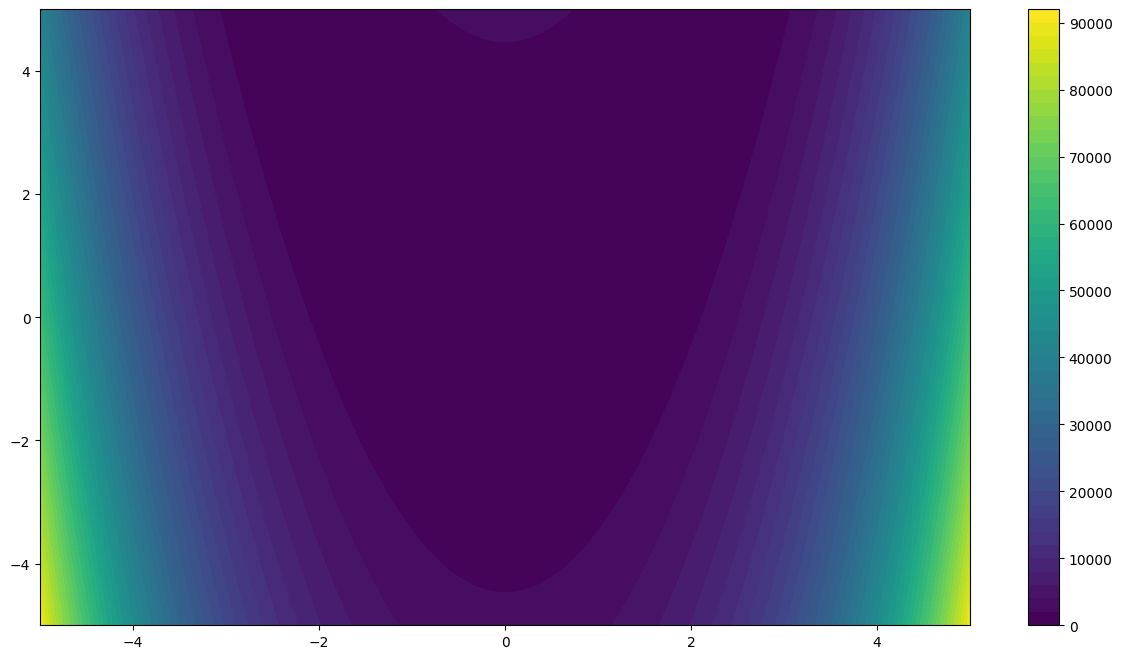

In [8]:
x = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, x)
Z = opt.rosen([X, Y])
fig, ax = plt.subplots()
cax = ax.contourf(X, Y, Z, 50)
fig.colorbar(cax)
plt.show()

Gradient descent takes over 11,000 iterations to compute the minimizer starting at $(-2,-2)$. 

In [9]:
gradient_descent(opt.rosen, opt.rosen_der, np.array([-2,-2]), maxiter=20000)

(array([ 0.9999912 ,  0.99998234]), 7.775709809680371e-11, 11990)